## LetsGrowMore - June,2022

## Submitted By Prajwal Kumbhar - Data Science Intern

### Task 3 : Prediction Using Decision Tree Classifier

Dataset: https://bit.ly/3kXTdox

#### Importing The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import rcParams

import warnings
warnings.filterwarnings("ignore")

### Reading the Data

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there are no null values, the next job is to visualize the data for better understanding

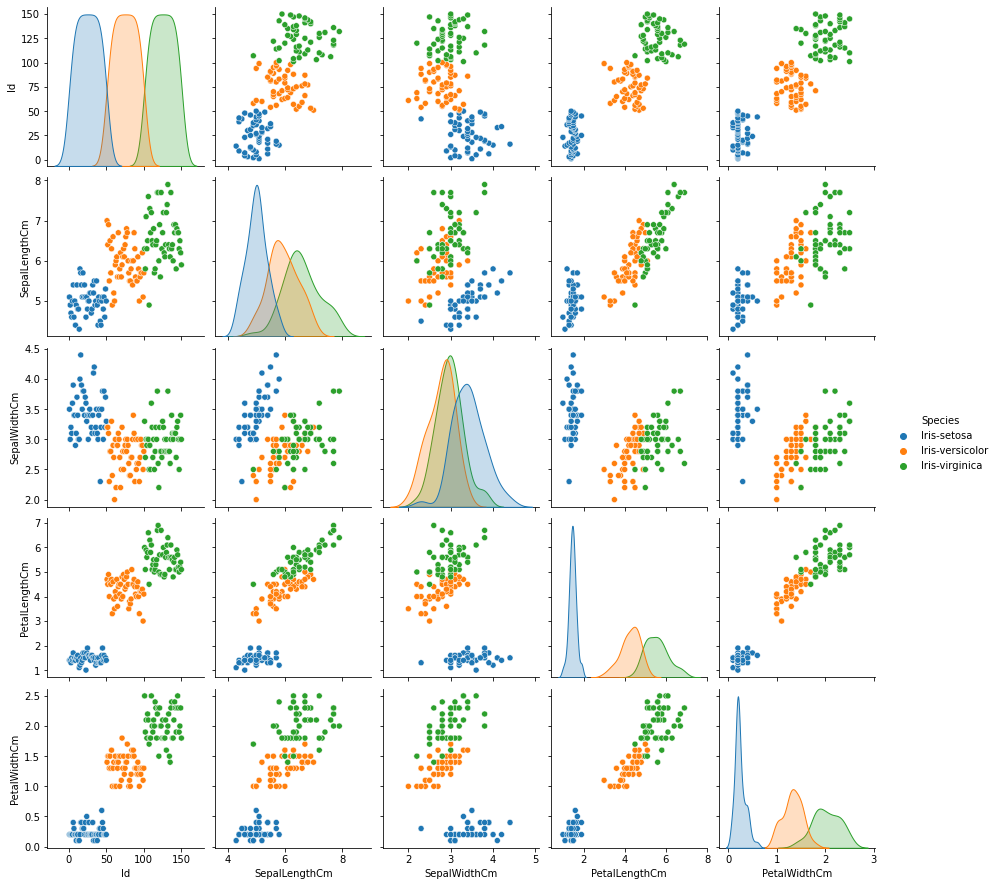

In [5]:
sns.pairplot(data, hue = 'Species')

Let's now plot a heatmap with the co-relation of the dataset

<AxesSubplot:>

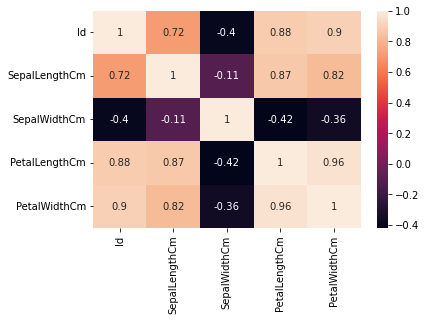

In [6]:
sns.heatmap(data.corr(), annot= True)

### Splitting Data and Processing Data

In [7]:
X = data.iloc[:, [0,1,2,3]]
y = data.Species
data.shape

(150, 6)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now that we have splitted our data, let us now build the Decision Tree

## Decision Tree

In [9]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [10]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [12]:
# let us print the accuracy score for the tree model
print("The accuracy score for the built model is:",accuracy_score(y_test, y_pred_test))

The accuracy score for the built model is: 1.0


The accuracy is upto the mark so let us now represent the data in a tree diagram

[Text(0.4, 0.8333333333333334, 'X[0] <= 50.0\nentropy = 1.58405\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.0\nentropy = 0.99896\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

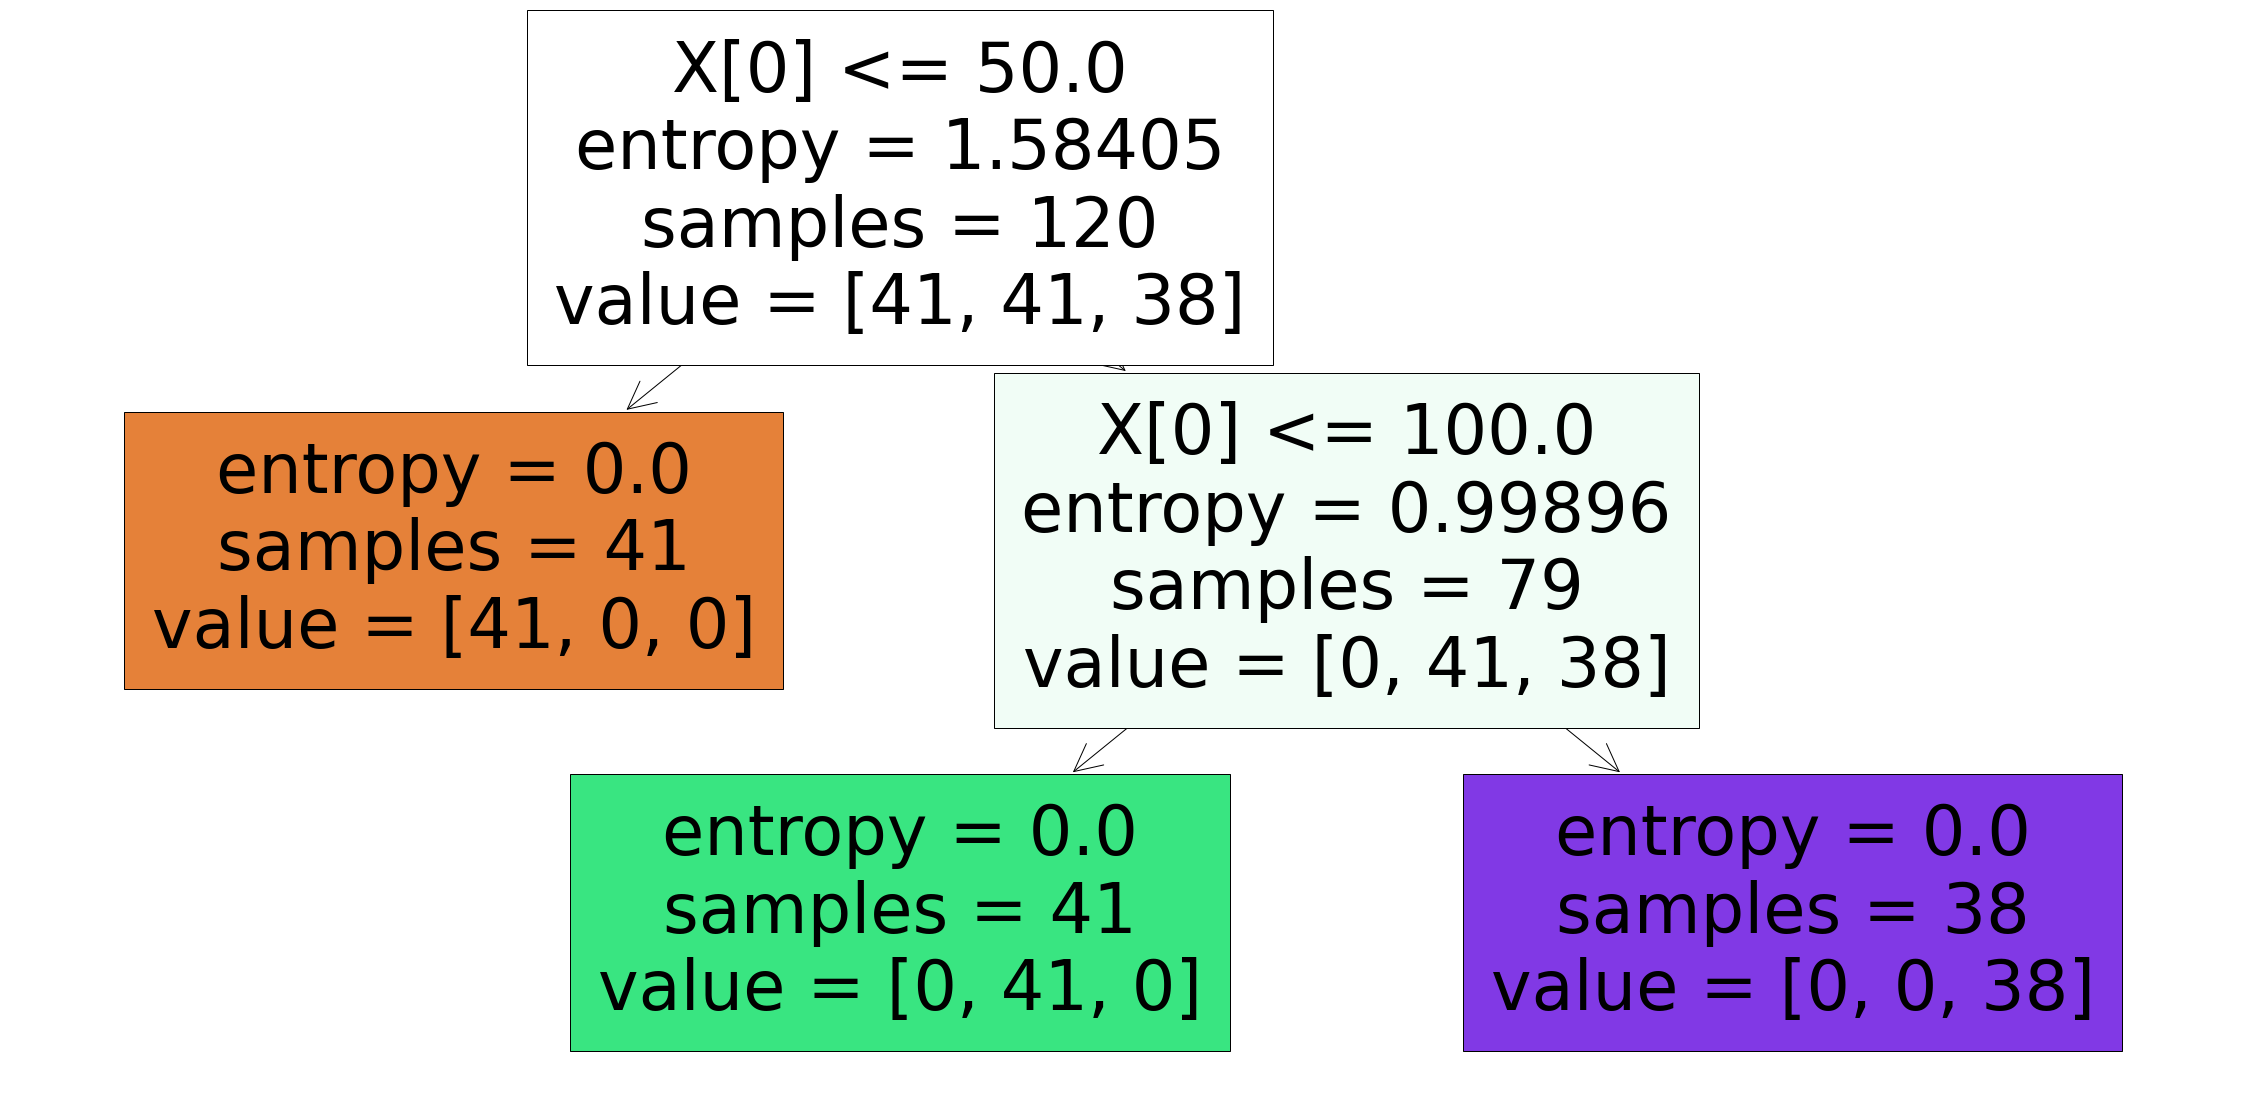

In [13]:
rcParams['figure.figsize'] = 40, 20
plot_tree(classifier, precision=5, rounded = False, filled = True)